# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [45]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [46]:
n = 64
x = np.linspace(0,1,n) + np.random.rand(4,n) # 4 dimensions
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0,1,n) + np.random.rand(n) 

In [47]:
x

array([[0.65949432, 0.0058436 , 0.28615813, 0.46145179, 1.        ],
       [0.31002764, 0.77742851, 0.83648465, 0.39356138, 1.        ],
       [0.22315685, 0.62743251, 0.88147162, 0.8495234 , 1.        ],
       [1.04412655, 0.64107408, 0.88055107, 0.16700819, 1.        ],
       [0.51675076, 0.68394808, 0.7307587 , 0.51829387, 1.        ],
       [0.5559257 , 0.34261801, 0.23083883, 0.11934018, 1.        ],
       [0.68905468, 0.14772906, 0.60539609, 0.64358833, 1.        ],
       [0.71369128, 0.69266717, 0.37316049, 0.33893481, 1.        ],
       [0.18160856, 0.49642544, 0.36002285, 0.17938712, 1.        ],
       [0.55758965, 0.30912537, 0.74334191, 0.59290489, 1.        ],
       [0.39274498, 0.67619203, 0.78319515, 0.61606101, 1.        ],
       [0.79585322, 0.74757093, 0.40635774, 0.67161021, 1.        ],
       [0.66863822, 0.84271659, 0.97769705, 0.4724434 , 1.        ],
       [1.00249079, 0.82255861, 0.58655367, 0.255409  , 1.        ],
       [0.74198871, 0.48740327, 1.

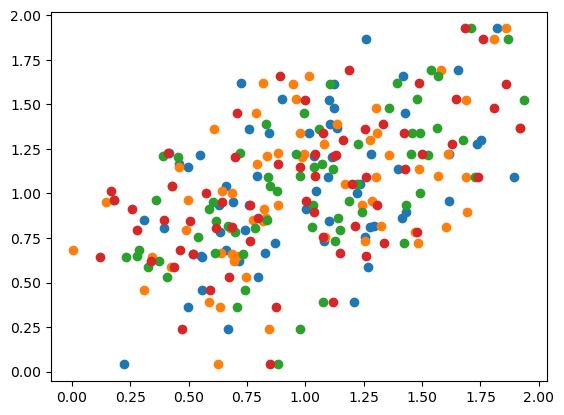

In [48]:
# Plotting All 4 Together
plt.scatter(x.T[0],y)
plt.scatter(x.T[1],y)
plt.scatter(x.T[2],y)
plt.scatter(x.T[3],y)

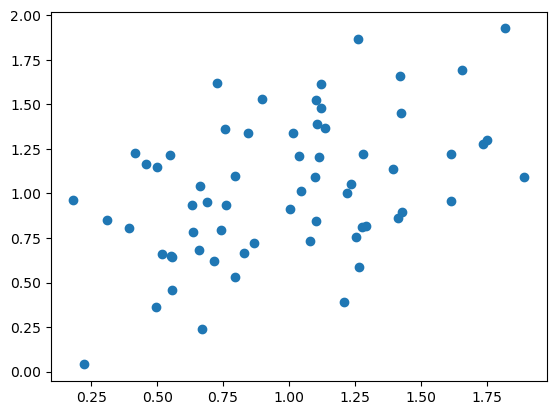

In [49]:
plt.scatter(x.T[0],y)

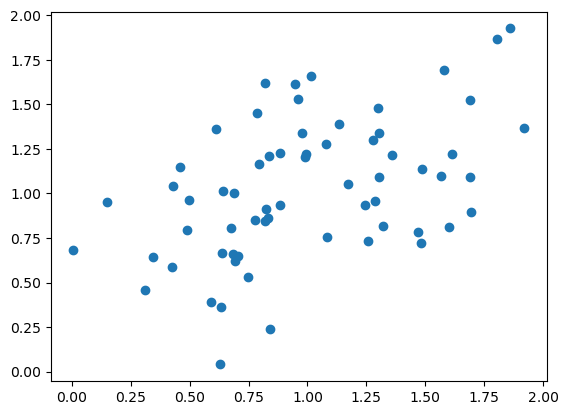

In [50]:
plt.scatter(x.T[1],y)

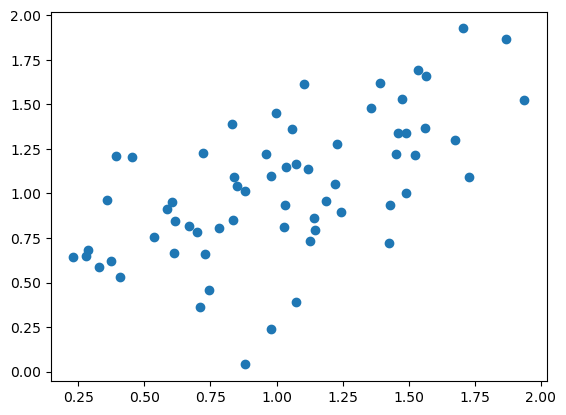

In [51]:
plt.scatter(x.T[2],y)

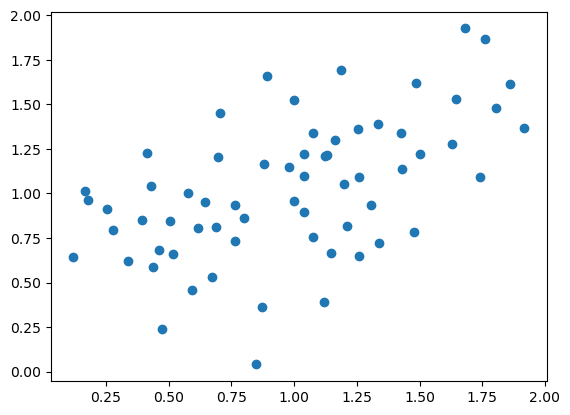

In [52]:
plt.scatter(x.T[3],y)

## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [53]:
# Revised Section
left = np.linalg.inv(np.dot(x.T, x))
left
right = np.dot(y.T, x)
right
np.dot(left, right)

array([ 0.14998773, -0.03646981,  0.36853516,  0.21030027,  0.33591638])

In [54]:
# Checking Answer via Least-Squares
beta = np.linalg.lstsq(x,y)[0]
beta

C:\Users\Brett\AppData\Local\Temp\ipykernel_26128\2544466947.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(x,y)[0]


array([ 0.14998773, -0.03646981,  0.36853516,  0.21030027,  0.33591638])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

In [55]:
pred = np.dot(x, beta)

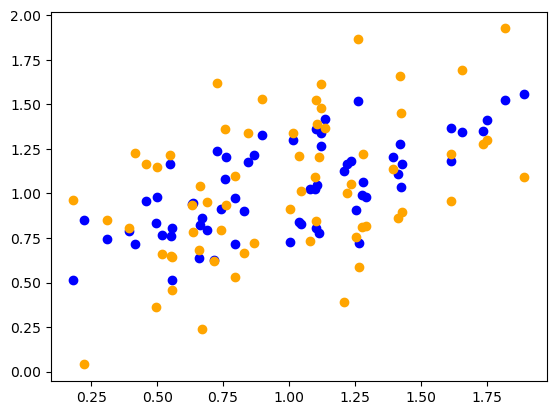

In [56]:
plt.scatter(x.T[0], pred, c='blue')
plt.scatter(x.T[0], y, c='orange')

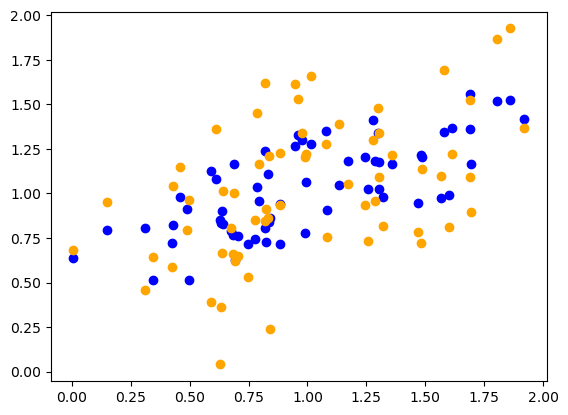

In [57]:
plt.scatter(x.T[1], pred, c='blue')
plt.scatter(x.T[1], y, c='orange')

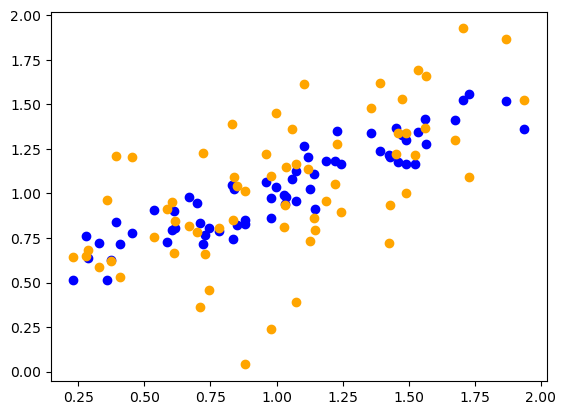

In [58]:
plt.scatter(x.T[2], pred, c='blue')
plt.scatter(x.T[2], y, c='orange')

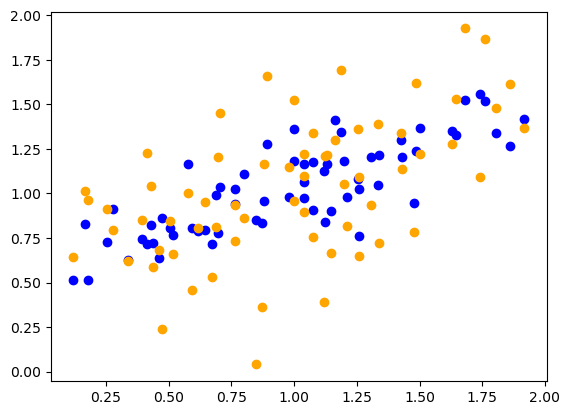

In [59]:
plt.scatter(x.T[3], pred, c='blue')
plt.scatter(x.T[3], y, c='orange')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [70]:
# Creating Model with Pandas 
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [71]:
# Had to read back in code for 'X' for linear model
columns = ['Income', 'Limit','Cards','Age','Education']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T

In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression
rating_lr = LinearRegression().fit(X, y, sample_weight=None)
pct_error = (rating_lr.predict(X) - y) / y 
abs(pct_error).mean()

0.02822992430275092

## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [73]:
columns = ['Income', 'Limit','Cards','Age','Education']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T


In [74]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

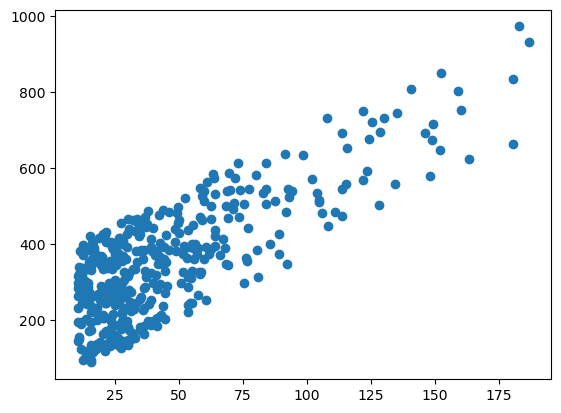

In [75]:
X[:, 0]
y
plt.scatter(X[:, 0],rating_lr.predict(X))

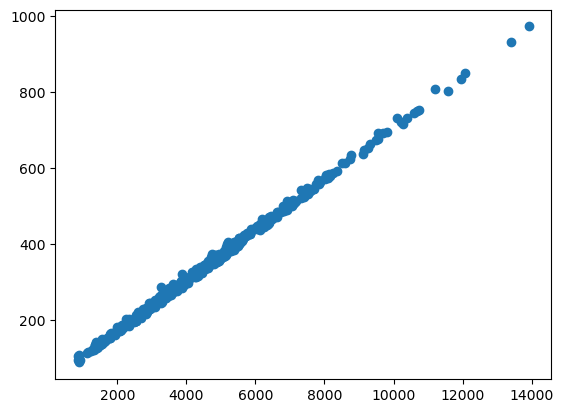

In [76]:
plt.scatter(X[:, 1],rating_lr.predict(X))

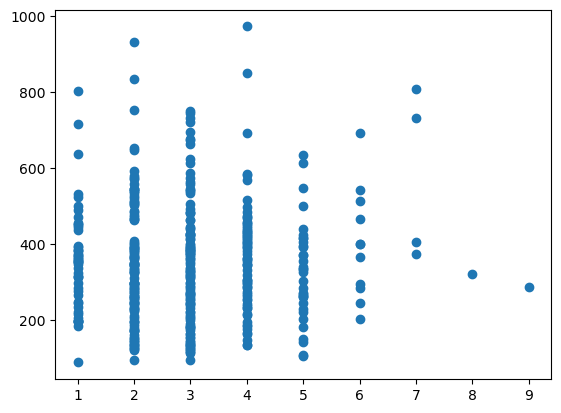

In [77]:
plt.scatter(X[:, 2],rating_lr.predict(X))

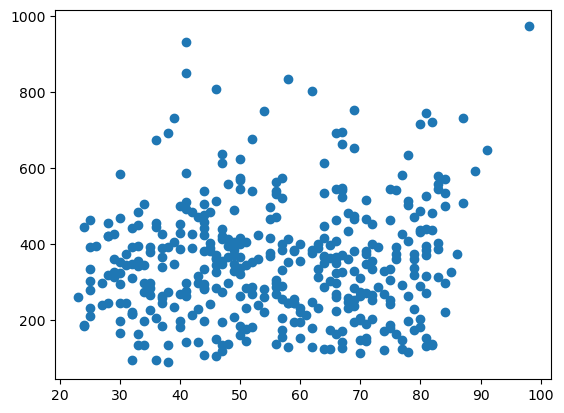

In [78]:
plt.scatter(X[:, 3],rating_lr.predict(X))

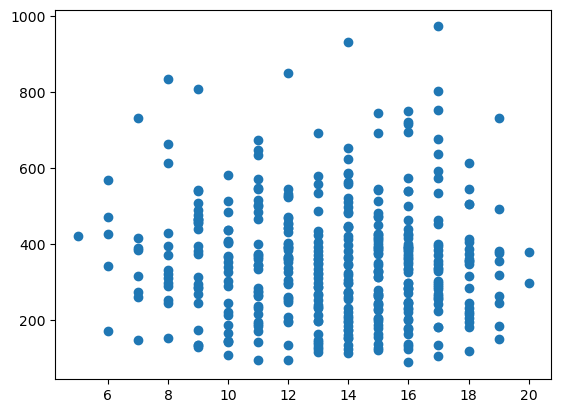

In [79]:
plt.scatter(X[:, 4],rating_lr.predict(X))